In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data_m.csv', index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3558 entries, 0 to 3557
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   VAP     3558 non-null   int64 
 1   TEXT    3558 non-null   object
dtypes: int64(1), object(1)
memory usage: 83.4+ KB


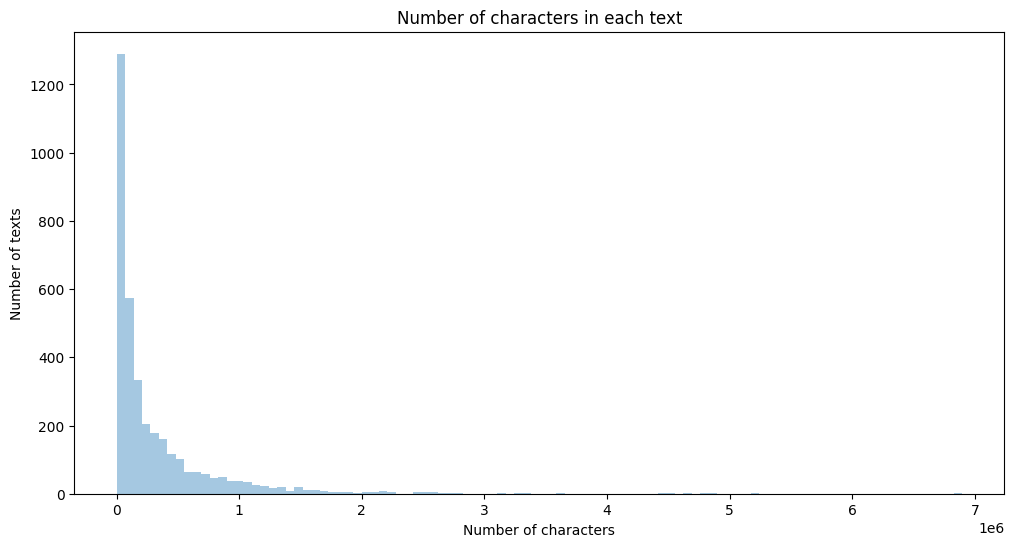

In [18]:
num_charachters = df['TEXT'].apply(len)

# plot the number of characters in each text in the dataset x is the number of row and y is the number of characters, plot in order to see the distribution of the number of characters in each text
plt.figure(figsize=(12, 6))
sns.distplot(num_charachters, kde=False, bins=100)
plt.xlabel('Number of characters')
plt.ylabel('Number of texts')
plt.title('Number of characters in each text')
plt.show()

In [5]:
def parse_medical_records(text):

    pattern = r'(\[\*\*\d{4}-\d{1,2}-\d{1,2}\*\*\]\s*\d{1,2}:\d{2}\s*(AM|PM).*?(?=\[\*\*\d{4}-\d{1,2}-\d{1,2}\*\*\]\s*\d{1,2}:\d{2}\s*(AM|PM)|$))'
    reports = re.findall(pattern, text, re.DOTALL)

    # extracted_reports = []
    # seen_reports = set()

    # for report_tuple in reports:
    #     report = report_tuple[0]  # Extract the report from the tuple

    #     # Extracting various pieces of information using regular expressions
    #     report_id = re.search(r'\[\*\*(\d{4}-\d{1,2}-\d{1,2})\*\*\]', report)
    #     type_of_exam = re.search(r'CHEST \((.*?)\)', report)
    #     clip_number = re.search(r'Clip Number \(Radiology\) (\d+)', report)
    #     reason_for_exam = re.search(r'Reason: (.+)', report)
    #     admitting_diagnosis = re.search(r'Admitting Diagnosis: (.+)', report)
    #     medical_condition = re.search(r'MEDICAL CONDITION:\n\s+(.+)', report)
    #     final_report = re.search(r'FINAL REPORT\n\s+(.+)', report, re.DOTALL)

    #     # Building the report string
    #     report_string = ""
    #     if report_id:
    #         report_string += f"Report ID: {report_id.group(1)}\n"
    #     if type_of_exam:
    #         report_string += f"Type of Exam: {type_of_exam.group(1)}\n"
    #     if clip_number:
    #         report_string += f"Clip Number: {clip_number.group(1)}\n"
    #     if reason_for_exam:
    #         report_string += f"Reason for Exam: {reason_for_exam.group(1)}\n"
    #     if admitting_diagnosis:
    #         report_string += f"Admitting Diagnosis: {admitting_diagnosis.group(1)}\n"
    #     if medical_condition:
    #         report_string += f"Medical Condition: {medical_condition.group(1)}\n"
    #     if final_report:
    #         report_string += f"Final Report: {final_report.group(1)}\n"

    #     report_string = report_string.strip()
        
    #     # Add report to the extracted reports if it's not a duplicate
    #     if report_string not in seen_reports:
    #         extracted_reports.append(report_string)
    #         seen_reports.add(report_string)

    return reports


In [6]:
# parse all patient records
parsed_records = df['TEXT'].apply(parse_medical_records)

In [7]:
num_reports_per_patient = [len(x) for x in parsed_records]

In [19]:
from pprint import pprint

pprint(df.iloc[28]['TEXT'])

('Wound infection\n'
 '   Assessment:\n'
 '   Repeat HCT remain ~ 21. TOF now [**1-17**] on cisatracurium at 0.25mg/kg, '
 'MA\n'
 '   20.\n'
 '   Action:\n'
 '   1 unit PRBC up ay 0647. continue sedation, pain med with paralytic\n'
 '   medication.\n'
 '   Response:\n'
 '   As above\n'
 '   Plan:\n'
 '   Check H&H after blood infusied.\n'
 '  Wound infection\n'
 '   Assessment:\n'
 '   Orally intubated to CMV mode, Rate 14, PEEP 5, VT 450, FIO2 0.4. Open\n'
 '   chest, black foam VAC Dsg intact, small amount serosanguinous drainage.\n'
 '   T max 99.1, WBC 6.6. HUO > 50cc/hr.  hemodynamics stable.  Blood\n'
 '   cultures  and urine cultures sent  on day shift [**11-24**]  .  Blood '
 'sugars\n'
 '   98 at 0300. No bowel sounds noted all shift.,  Abdomen soft, HOB 15\n'
 '   degrees d/t open chest,  Tube feeds infusing via OGT.\n'
 '   Action:\n'
 '   Sputum Culture sent. Nafcillin IV  q4h. Tube feeds stopped at '
 '[**2173**].\n'
 '   Response:\n'
 '   afebrile\n'
 '   Plan:\n'
 '   T

Implementing a hierarchical model for handling multiple reports per patient involves a two-level architecture. The first level processes individual reports, and the second level aggregates the outputs across these reports to make a final prediction for each patient. Here's a step-by-step guide to implement this approach:

### 1. Preprocessing:
- **Segment Reports**: Ensure each patient's reports are segmented correctly and gathered together.
- **Tokenization**: Tokenize each report using the tokenizer appropriate for your transformer model.

### 2. First-Level Transformer Model:
- **Model Selection**: Choose a suitable transformer model (like BERT, GPT, etc.) for text analysis.
- **Process Each Report**: Feed each report into the transformer model individually. This model will capture the nuances and details in each report.
- **Output Representation**: Extract a fixed-size vector representation for each report. This could be the [CLS] token's embedding in BERT, for example, or a pooled representation of all token embeddings.

### 3. Second-Level Aggregation Model:
- **Input**: The input to this model is the sequence of vector representations from the first-level model, one for each report.
- **Model Choice**: You can use another transformer, an RNN (like LSTM or GRU), or even simpler methods like averaging or max pooling. The choice depends on the importance of understanding the sequence and relationships between reports.
- **Temporal Information**: If the order of reports is important, an RNN or transformer as the second-level model is preferable as it can capture temporal dynamics.

### 4. Training:
- **Batching**: When batching data, ensure that each batch contains a sequence of report embeddings for each patient. Handle variable lengths either by padding or by using dynamic batching.
- **Loss Function and Optimization**: Choose a loss function that aligns with your prediction task (binary classification, multi-class classification, etc.). Optimize the model using gradient descent.

### 5. Prediction:
- **Aggregated Output**: The second-level model will provide an aggregated output representing the collective information from all reports of a patient.
- **Final Prediction**: Use this output to make the final prediction (e.g., patient's health status).

### 6. Practical Considerations:
- **Memory Constraints**: Depending on your model size and the number of reports, you may face memory constraints. It's important to manage the computational resources effectively.
- **Sequence Lengths**: Be mindful of the maximum sequence length of the transformer model, especially at the first level.
- **Model Complexity**: This approach is more complex and might require careful tuning and sufficient training data to capture the relationships effectively.

### 7. Example Architecture:
```python
class HierarchicalTransformerModel(nn.Module):
    def __init__(self, transformer_model, second_level_model):
        super().__init__()
        self.transformer_model = transformer_model  # First level
        self.second_level_model = second_level_model  # Second level

    def forward(self, batch_of_reports):
        # Process each report with transformer_model
        # Aggregate report embeddings
        # Feed aggregated embeddings to second_level_model
        # Return final prediction
```

### 8. Implementation:
- **Frameworks**: Implement this in a deep learning framework like PyTorch or TensorFlow.
- **Data Handling**: Carefully handle the data to ensure reports are correctly aligned with patients.


In [12]:
data = []

for record, vpa in zip(parsed_records, df['VAP']):
    patient_record = {}
    patient_record["record"] = record
    patient_record["vpa"] = vpa
    data.append(patient_record)

In [13]:
from transformers import BertTokenizer, BertModel
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tokenizer and BERT model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

# Custom Dataset
class MedicalReportDataset(torch.utils.data.Dataset):
    def __init__(self, reports, labels, max_length=512):
        self.reports = reports
        self.labels = labels
        self.max_length = max_length

    def __len__(self):
        return len(self.reports)

    def __getitem__(self, idx):
        # Tokenize and pad the reports for the patient
        tokenized_reports = [tokenizer.encode(report, add_special_tokens=True, max_length=self.max_length, truncation=True) for report in self.reports[idx]]
        padded_reports = np.array([np.pad(r, (0, self.max_length - len(r)), mode='constant') for r in tokenized_reports])
        
        # Generate attention masks
        attention_masks = np.where(padded_reports != 0, 1, 0)

        return torch.tensor(padded_reports), torch.tensor(attention_masks), torch.tensor(self.labels[idx])

# Custom RNN model
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.LSTM(input_size=768, hidden_size=128, num_layers=2, batch_first=True)
        self.fc = nn.Linear(128, 1)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])
        return torch.sigmoid(x)

# Prepare your data
reports = [item['record'] for item in data]
labels = [item['vpa'] for item in data]

# Split data into training and testing sets
train_reports, test_reports, train_labels, test_labels = train_test_split(reports, labels, test_size=0.2, random_state=42)

# Create dataloaders for train and test sets
train_dataset = MedicalReportDataset(train_reports, train_labels)
test_dataset = MedicalReportDataset(test_reports, test_labels)

train_dataloader = DataLoader(train_dataset, batch_size=1)
test_dataloader = DataLoader(test_dataset, batch_size=1)

# Instantiate RNN model
rnn_model = RNNModel()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} for training")
rnn_model.to(device)
bert_model.to(device)

# Training loop
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=1e-4)

class_0_count = sum(np.array(labels) == 0)
class_1_count = sum(np.array(labels) == 1)
total_count = class_0_count + class_1_count

# Calculate class weights
class_0_weight = class_1_count / total_count
class_1_weight = class_0_count / total_count

# Initialize BCELoss without weights
criterion = nn.BCELoss(reduction='none')

num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")

    # Initialize the progress bar for the batches within the current epoch
    with tqdm(train_dataloader, desc="Processing Batches", unit="batch") as tepoch:
        for batch_reports, attention_masks, batch_labels in tepoch:
            aggregated_outputs = []

            if batch_reports.size(1) == 0:
                # Handle the case where there are no reports
                continue

            for report, mask in zip(batch_reports.squeeze(0), attention_masks.squeeze(0)):
                inputs = report.unsqueeze(0).to(device)
                mask = mask.unsqueeze(0).to(device)

                with torch.no_grad():
                    outputs = bert_model(inputs, attention_mask=mask)[1]  # Get the pooled output with attention mask
                    aggregated_outputs.append(outputs)

            if len(aggregated_outputs) == 0:
                # If no outputs were collected, skip this batch
                continue

            # Convert to a tensor and process through RNN
            aggregated_outputs = torch.stack(aggregated_outputs).squeeze(1)
            predictions = rnn_model(aggregated_outputs.unsqueeze(0))

            # Ensure predictions and labels are correctly shaped
            predictions = predictions.squeeze()
            if len(predictions.size()) == 0:
                predictions = predictions.unsqueeze(0)  # Add a dimension if predictions are a scalar
            batch_labels = batch_labels.float().to(device)

            loss = criterion(predictions, batch_labels)
            loss = loss * (batch_labels * class_1_weight + (1 - batch_labels) * class_0_weight)
            loss = loss.mean()

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update the progress bar
            tepoch.set_postfix(loss=loss.item())
            
            
def evaluate_model(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for batch_reports, attention_masks, batch_labels in dataloader:
            aggregated_outputs = []

            if batch_reports.size(1) == 0:
                # Handle the case where there are no reports
                continue

            for report, mask in zip(batch_reports.squeeze(0), attention_masks.squeeze(0)):
                inputs = report.unsqueeze(0).to(device)
                mask = mask.unsqueeze(0).to(device)

                with torch.no_grad():
                    outputs = bert_model(inputs, attention_mask=mask)[1]  # Get the pooled output with attention mask
                    aggregated_outputs.append(outputs)

            if len(aggregated_outputs) == 0:
                # If no outputs were collected, skip this batch
                continue

            # Convert to a tensor and process through RNN
            aggregated_outputs = torch.stack(aggregated_outputs).squeeze(1)
            predictions = rnn_model(aggregated_outputs.unsqueeze(0))
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(batch_labels.cpu().numpy())

    # Calculate metrics
    all_predictions = np.array(all_predictions) >= 0.5  # Convert to binary predictions
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)
    return accuracy, precision, recall, f1

# Evaluate the model
accuracy, precision, recall, f1 = evaluate_model(rnn_model, test_dataloader)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Using cuda for training
Epoch 1/5


Processing Batches:   0%|          | 4/2846 [00:06<1:20:00,  1.69s/batch, loss=0.112]


KeyboardInterrupt: 